In [ ]:
# Classify the email using the binary classification method.
# Email Spam detection has two states:
# a) Normal State - Not Spam,
# b) Abnormal State - Spam.
# Use K-Nearest Neighbors and Support Vector Machine for classification.
# Analyze their performance. Dataset link: The emails.csv dataset on the Kaggle

In [ ]:
import pandas as pd
df = pd.read_csv("emails.csv")
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4509,Email 4510,3,8,1,1,2,0,53,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4510,Email 4511,0,3,2,0,2,0,16,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4511,Email 4512,3,0,1,2,1,0,16,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4512,Email 4513,0,1,1,2,0,1,20,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,1
allowing,1
ff,1
dry,1


In [ ]:
df.dropna(inplace = True)
df.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


In [ ]:
df.drop(["Email No."], axis = 1, inplace = True)
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,13,24,6,6,2,102,1,27,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,1,0,0,0,8,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,5,22,0,5,1,51,2,10,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,6,17,1,5,2,57,0,9,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,0,0,1,0,1,0,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4509,3,8,1,1,2,0,53,4,0,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4510,0,3,2,0,2,0,16,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4511,3,0,1,2,1,0,16,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

y = df["Prediction"]
x = df.loc[:, df.columns != "Prediction"]
x = scale(x)# for normalization

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

In [ ]:
#K Nearest Neighbour Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, prediction))
print("Confusion Matrix: ", confusion_matrix(y_test, prediction))


Accuracy:  0.7751677852348994
Confusion Matrix:  [[750 318]
 [ 17 405]]


In [ ]:
#Support Vector Machine
from sklearn.svm import SVC

model = SVC(C=1)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, prediction))
print("Confusion Matrix: ", confusion_matrix(y_test, prediction))

Accuracy:  0.934228187919463
Confusion Matrix:  [[1062    6]
 [  92  330]]


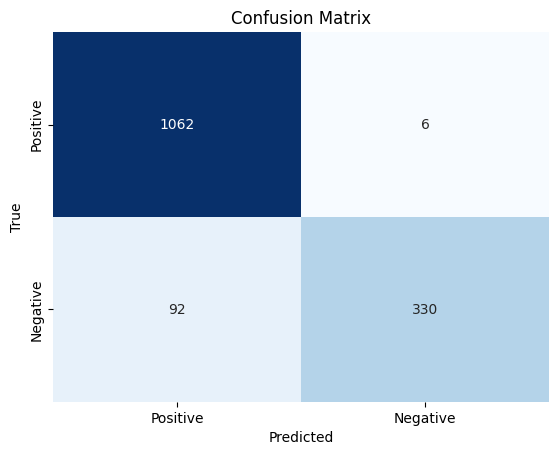

In [ ]:
cm = confusion_matrix(y_test, prediction)
# Create a heatmap with labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()